In [4]:
#importamos las librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import time
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests


In [2]:
no_page = 2
headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}
r = requests.get('https://www.amazon.in/s?k=camera+for+photography&page='+str(no_page)+"&crid=YGJ54J8WIPW8&qid=1685455974&sprefix=camara+%2Caps%2C715&ref=sr_pg_"+str(no_page), headers=headers)#, proxies=proxies)
content = r.content #extraer el contenido
soup = BeautifulSoup(content) #pasarlo más leible
soup.find_all('div', attrs={'class':'sg-col-inner'}) 

[]

In [6]:
no_pages = 8

def get_data(pageNo):
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0",
        "Accept-Encoding": "gzip, deflate",
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8",
        "DNT": "1",
        "Connection": "close",
        "Upgrade-Insecure-Requests": "1"
    }

    r = requests.get('https://www.amazon.in/s?k=camera+for+photography&page=' + str(no_pages) + "&crid=YGJ54J8WIPW8&qid=1685455974&sprefix=camara+%2Caps%2C715&ref=sr_pg_" + str(no_pages), headers=headers)
    content = r.content
    soup = BeautifulSoup(content, 'html.parser')

    alls = []
    for d in soup.find_all('div', attrs={'class': 'sg-col-inner'}):
        name = d.find('span', attrs={'class': 'a-size-medium a-color-base a-text-normal'})
        rating = d.find('span', attrs={'class': 'a-size-base s-underline-text'})
        users_rated = d.find('span', attrs={'class': 'a-icon a-icon-star-small a-star-small-4-5 aok-align-bottom'})
        price = d.find('span', attrs={'class': 'a-price-whole'})

        all1 = []

        if name is not None:
            all1.append(name.text)
        else:
            all1.append("unknown-product")

        if rating is not None:
            all1.append(rating.text)
        else:
            all1.append('-1')

        if users_rated is not None:
            all1.append(users_rated.text)
        else:
            all1.append('0')

        if price is not None:
            all1.append(price.text)
        else:
            all1.append('0')

        alls.append(all1)

    return alls

In [7]:
results = []
for i in range(1, no_pages+1):
  results.append(get_data(i))

In [ ]:
results

In [8]:
flatten = lambda l: [item for sublist in l for item in sublist] #funcion lambda, lista de comprension / 
df = pd.DataFrame(flatten(results),columns=['Name','Rating','Customers_Rated', 'Price']) #DataFrame / para presentar en un formto de de tabla
df = df.drop(df[df['Name'] == 'unknown-product'].index)
df.to_csv('amazon_products.csv', index=False, encoding='utf-8') #guardar en un archivo csv

In [9]:
df

,Name,Rating,Customers_Rated,Price
2,"ULANZI VL49 RGB Video, LED Camera Light 360° F...","3,359",0,"1,999"
3,"ULANZI VL49 RGB Video, LED Camera Light 360° F...","3,359",0,"1,999"
5,"ULANZI VL49 RGB Video, LED Camera Light 360° F...","3,359",0,"1,999"
8,Powerpak 110cm/42 inch 5 in 1 Photography Came...,122,0,965
10,Powerpak 110cm/42 inch 5 in 1 Photography Came...,122,0,965
13,HIFFIN E27 Studio Single Holder Umbrella Light...,725,0,"3,349"
15,HIFFIN E27 Studio Single Holder Umbrella Light...,725,0,"3,349"
18,DIGITEK® (DCL-150W) Continuous LED Photo/Video...,142,0,"10,190"
20,DIGITEK® (DCL-150W) Continuous LED Photo/Video...,142,0,"10,190"
23,YONGNUO YN660LED Wand Stick Photography Light ...,7,0,"15,276"


In [10]:
data = df.sort_values(["Price"], axis=0, ascending=False)[:10]

data

,Name,Rating,Customers_Rated,Price
8,Powerpak 110cm/42 inch 5 in 1 Photography Came...,122,0,965
10,Powerpak 110cm/42 inch 5 in 1 Photography Came...,122,0,965
60,IKZAI Mobile Video Recording kit with Tripod S...,8,0,799
58,IKZAI Mobile Video Recording kit with Tripod S...,8,0,799
55,Madhechi Gold Camera Necklace photography enth...,-1,0,799
53,Madhechi Gold Camera Necklace photography enth...,-1,0,799
80,PowerPak MK-26 Tabletop Mini Portable Photo St...,77,0,740
78,PowerPak MK-26 Tabletop Mini Portable Photo St...,77,0,740
75,DIGITEK® (LED D1120B) Professional LED 50W Vid...,-1,0,"5,495"
73,DIGITEK® (LED D1120B) Professional LED 50W Vid...,-1,0,"5,495"


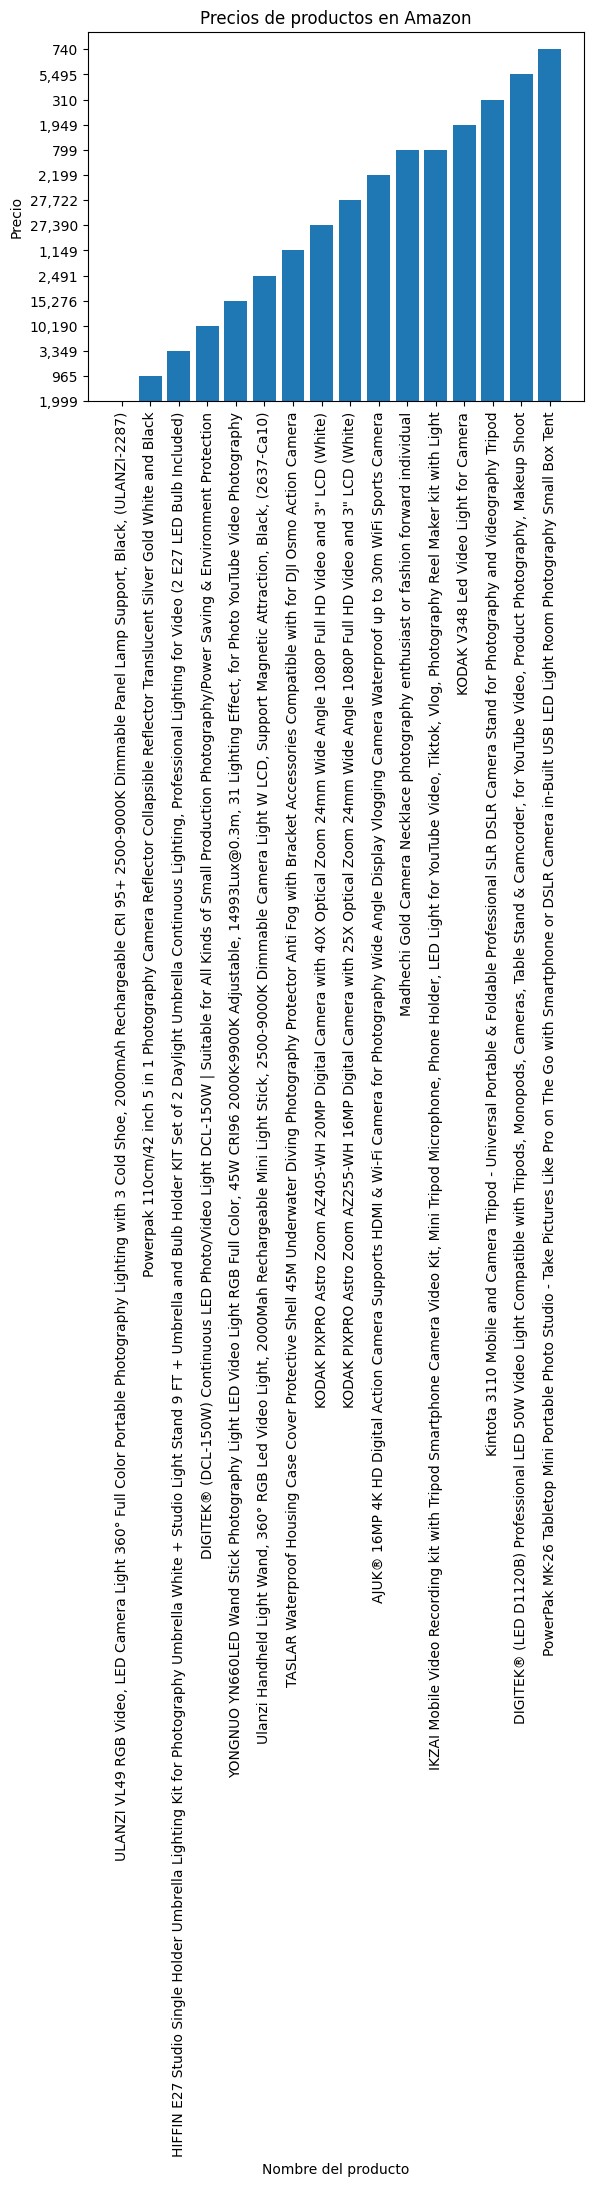

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('amazon_products.csv')

# Eliminar las filas con 'unknown-product'
df = df.drop(df[df['Name'] == 'unknown-product'].index)

# Crear el gráfico de barras
plt.bar(df['Name'], df['Price'])

# Personalizar el gráfico
plt.xlabel('Nombre del producto')
plt.ylabel('Precio')
plt.title('Precios de productos en Amazon')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()


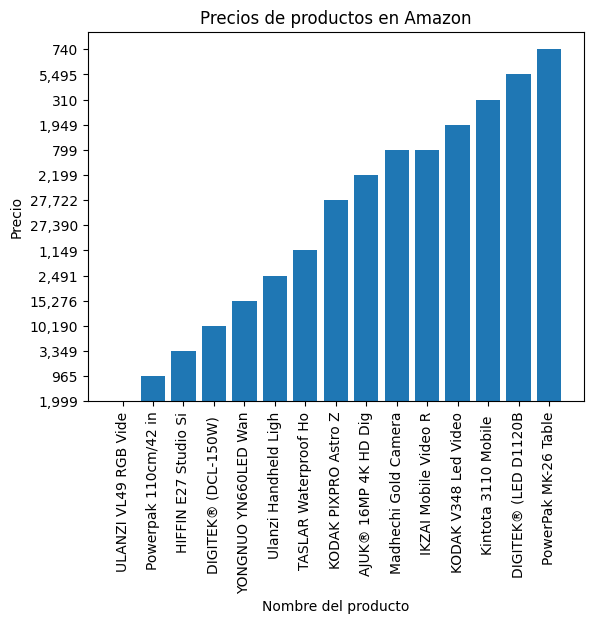

In [12]:
      #CON EL NOMBRE RESUMIDO XD
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('amazon_products.csv')

# Eliminar las filas con 'unknown-product'
df = df.drop(df[df['Name'] == 'unknown-product'].index)

# Truncar los nombres de producto a 20 caracteres
df['Name'] = df['Name'].str.slice(0, 20)

# Crear el gráfico de barras
plt.bar(df['Name'], df['Price'])

# Personalizar el gráfico
plt.xlabel('Nombre del producto')
plt.ylabel('Precio')
plt.title('Precios de productos en Amazon')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()
